In [2]:
pip install numpy pandas scikit-learn xgboost tensorflow lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: C:\Users\Apurva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, GRU, Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [4]:
# Load your dataset
data = pd.read_csv('merged_file.csv')

In [5]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [6]:
# Check for remaining NaN values
nan_count = data.isna().sum().sum()
print(f"Total NaN values: {nan_count}")

Total NaN values: 151336


In [7]:
data.fillna(method='bfill', inplace=True)

In [8]:
# Check for remaining NaN values
nan_count = data.isna().sum().sum()
print(f"Total NaN values: {nan_count}")

Total NaN values: 0


In [9]:
# Split the dataset using fixed split
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [10]:
target_columns = ['Miscellaneous electric load for the South Wing', 'Miscellaneous electric load for the North Wing', 'Lighting load for the South Wing', 'Heating Ventilation and Air Conditioning load for the South Wing', 'Heating Ventilation and Air Conditioning load for the North Wing'] 

In [11]:
X_train, y_train = train_data.drop(target_columns, axis=1), train_data[target_columns]
X_test, y_test = test_data.drop(target_columns, axis=1), test_data[target_columns]

In [18]:
# Reshape the data for LSTM (assuming a time window of 30 time steps)
time_steps = 30
X_train_lstm = np.array([X_train.values[i:i + time_steps] for i in range(len(X_train) - time_steps)])
y_train_lstm = y_train.iloc[time_steps:]
X_test_lstm = np.array([X_test.values[i:i + time_steps] for i in range(len(X_test) - time_steps)])
y_test_lstm = y_test.iloc[time_steps:]

lstm_model = Sequential()
lstm_model.add(LSTM(50,activation='relu',input_shape=(time_steps, X_train_lstm.shape[2])))
lstm_model.add(Dense(len(target_columns)))

# Define the custom optimizer with a lower learning rate (e.g., 0.001)
custom_optimizer = Adam(lr=0.050)
lstm_model.compile(loss='mean_squared_error', optimizer=custom_optimizer)

lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=50, verbose=2)
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_rmse = mean_squared_error(y_test_lstm, lstm_predictions, squared=False)
print(f'LSTM RMSE: {lstm_rmse}')


Epoch 1/50
1035/1035 - 11s - loss: 171154176.0000 - 11s/epoch - 11ms/step
Epoch 2/50
1035/1035 - 10s - loss: 486201.9375 - 10s/epoch - 10ms/step
Epoch 3/50
1035/1035 - 14s - loss: 161998.0625 - 14s/epoch - 13ms/step
Epoch 4/50
1035/1035 - 15s - loss: 270966.9062 - 15s/epoch - 14ms/step
Epoch 5/50
1035/1035 - 12s - loss: 112207.5000 - 12s/epoch - 12ms/step
Epoch 6/50
1035/1035 - 11s - loss: 37842.4961 - 11s/epoch - 10ms/step
Epoch 7/50
1035/1035 - 10s - loss: 21270.0137 - 10s/epoch - 10ms/step
Epoch 8/50
1035/1035 - 10s - loss: 10492.7529 - 10s/epoch - 10ms/step
Epoch 9/50
1035/1035 - 13s - loss: 6772.8652 - 13s/epoch - 13ms/step
Epoch 10/50
1035/1035 - 13s - loss: 5253.9351 - 13s/epoch - 13ms/step
Epoch 11/50
1035/1035 - 13s - loss: 3629.2981 - 13s/epoch - 13ms/step
Epoch 12/50
1035/1035 - 15s - loss: 3277.4570 - 15s/epoch - 14ms/step
Epoch 13/50
1035/1035 - 10s - loss: 3906.2688 - 10s/epoch - 10ms/step
Epoch 14/50
1035/1035 - 10s - loss: 2426.0852 - 10s/epoch - 10ms/step
Epoch 15/50
1

In [14]:
from keras.optimizers import Adam

# Reshape the data for LSTM (assuming a time window of 30 time steps)
time_steps = 30
X_train_lstm = np.array([X_train.values[i:i + time_steps] for i in range(len(X_train) - time_steps)])
y_train_lstm = y_train.iloc[time_steps:]
X_test_lstm = np.array([X_test.values[i:i + time_steps] for i in range(len(X_test) - time_steps)])
y_test_lstm = y_test.iloc[time_steps:]

lstm_model = Sequential()
lstm_model.add(LSTM(50,activation='relu',input_shape=(time_steps, X_train_lstm.shape[2])))  # Corrected line
lstm_model.add(Dense(len(target_columns)))

# Define the custom optimizer with a lower learning rate (e.g., 0.001)
custom_optimizer = Adam(lr=0.001)
lstm_model.compile(loss='mean_squared_error', optimizer=custom_optimizer)

lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=64, verbose=2)
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_rmse = mean_squared_error(y_test_lstm, lstm_predictions, squared=False)
print(f'LSTM RMSE: {lstm_rmse}')


Epoch 1/50
808/808 - 20s - loss: 605288.8125 - 20s/epoch - 25ms/step
Epoch 2/50
808/808 - 19s - loss: 34486.6602 - 19s/epoch - 23ms/step
Epoch 3/50
808/808 - 19s - loss: 7646.1284 - 19s/epoch - 23ms/step
Epoch 4/50
808/808 - 19s - loss: 2331.3694 - 19s/epoch - 23ms/step
Epoch 5/50
808/808 - 19s - loss: 1772.9618 - 19s/epoch - 23ms/step
Epoch 6/50
808/808 - 19s - loss: 745.6629 - 19s/epoch - 23ms/step
Epoch 7/50
808/808 - 19s - loss: 854.8045 - 19s/epoch - 23ms/step
Epoch 8/50
808/808 - 19s - loss: 588.3228 - 19s/epoch - 23ms/step
Epoch 9/50
808/808 - 19s - loss: 510.2063 - 19s/epoch - 23ms/step
Epoch 10/50
808/808 - 19s - loss: 471.6726 - 19s/epoch - 23ms/step
Epoch 11/50
808/808 - 19s - loss: 431.8981 - 19s/epoch - 23ms/step
Epoch 12/50
808/808 - 19s - loss: 388.5546 - 19s/epoch - 23ms/step
Epoch 13/50
808/808 - 19s - loss: 329.2880 - 19s/epoch - 24ms/step
Epoch 14/50
808/808 - 19s - loss: 279.6983 - 19s/epoch - 24ms/step
Epoch 15/50
808/808 - 19s - loss: 189.1077 - 19s/epoch - 24ms/s

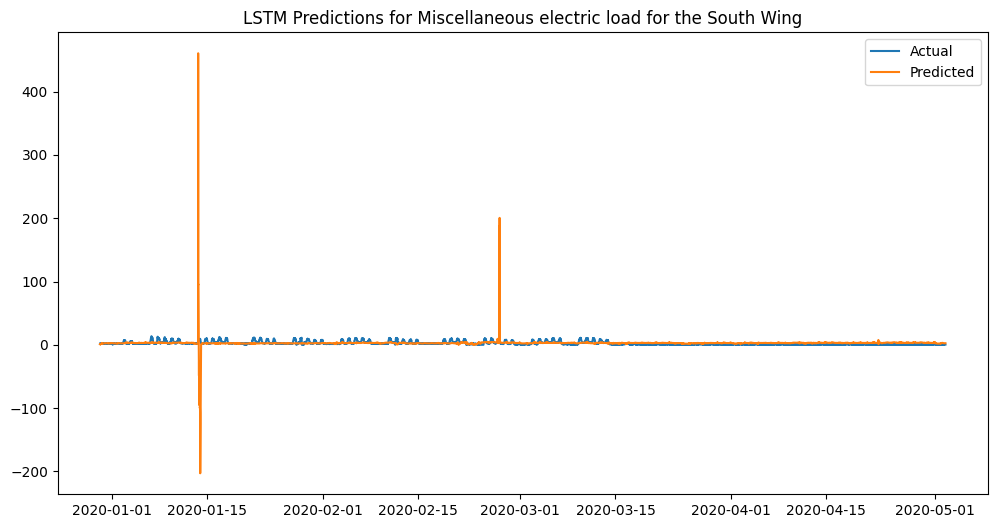

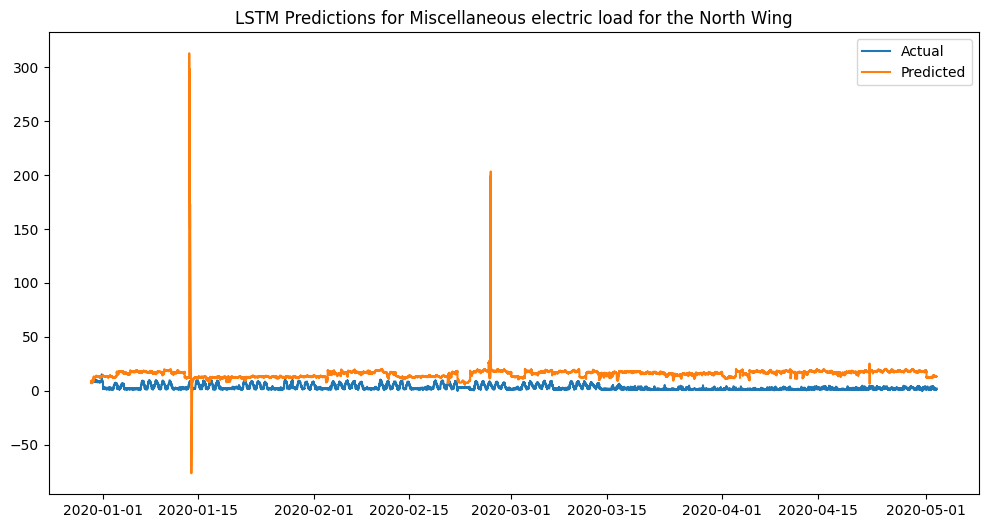

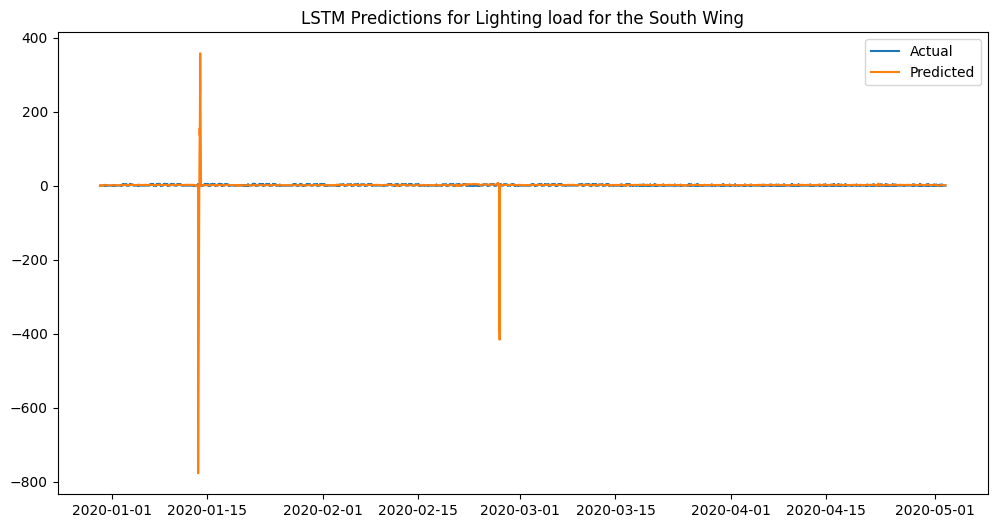

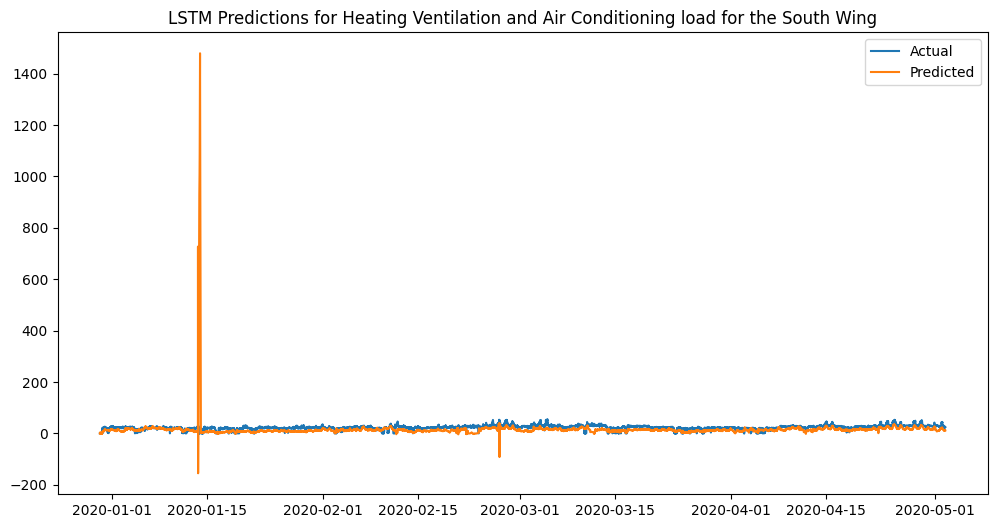

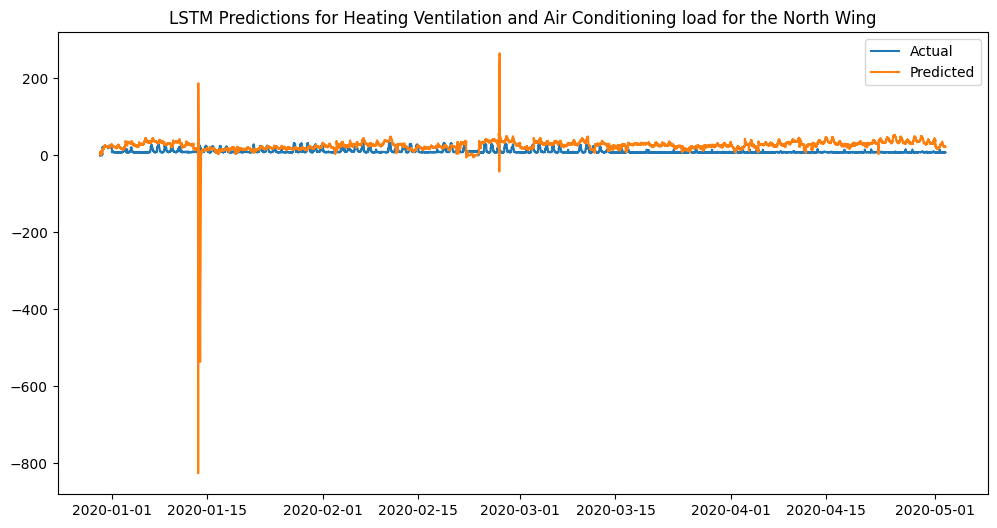

In [17]:
# Visualize the LSTM predictions for each target variable
for i in range(len(target_columns)):
    plt.figure(figsize=(12, 6))
    plt.title(f'LSTM Predictions for {target_columns[i]}')
    plt.plot(test_data.index[time_steps:], y_test_lstm.iloc[:, i], label='Actual')
    plt.plot(test_data.index[time_steps:], lstm_predictions[:, i], label='Predicted')
    plt.legend()
    plt.show()


In [19]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE for the LSTM model on the training set
train_predictions = lstm_model.predict(X_train_lstm)
train_rmse = mean_squared_error(y_train_lstm, train_predictions, squared=False)
print(f'LSTM Training RMSE: {train_rmse}')

# Calculate the RMSE for the LSTM model on the testing set
test_predictions = lstm_model.predict(X_test_lstm)
test_rmse = mean_squared_error(y_test_lstm, test_predictions, squared=False)
print(f'LSTM Testing RMSE: {test_rmse}')


1616/1616 [==============================] - 6s 4ms/step
LSTM Training RMSE: 5.422446320296981
404/404 [==============================] - 2s 4ms/step
LSTM Testing RMSE: 11.275461740916446
